<a href="https://colab.research.google.com/github/Shivamani162/2303A52344-STML/blob/main/Project_SML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = '/content/drive/MyDrive/TESLA.csv'
data = pd.read_csv(file_path) # Load data from the CSV file using pandas

# Select features and target variable
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 20.151123648216497
R-squared (R2): 0.9912841805366459


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Set a random seed for reproducibility
np.random.seed(42)

# Simulate a dataset with a very strong relationship between features and target
data = pd.DataFrame({
    'Open': np.random.uniform(700, 800, 100),
    'High': np.random.uniform(710, 810, 100),
    'Low': np.random.uniform(690, 790, 100),
    'Volume': np.random.uniform(1e6, 5e6, 100)
})

# Create a target variable 'Close' with a strong, predictable linear relationship to the features
data['Close'] = 0.4 * data['Open'] + 0.3 * data['High'] + 0.2 * data['Low'] + 0.000001 * data['Volume'] + np.random.normal(0, 3, 100)

# Select features and target variable
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Close']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Use GridSearchCV to find the best 'n_neighbors' for KNN
param_grid = {'n_neighbors': range(2, 10)}
knn = KNeighborsRegressor()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best model and evaluate on the test set
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Optimal number of neighbors:", grid_search.best_params_['n_neighbors'])
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)


Optimal number of neighbors: 4
Mean Squared Error (MSE): 64.64899159026275
R-squared (R2): 0.8166719578464352


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = '/mnt/data/TESLA.csv'

# Select features and target variable
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Regressor model
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = tree_model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)


Mean Squared Error (MSE): 58.901463251738555
R-squared (R2): 0.9745237769966749


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = '/content/drive/MyDrive/TESLA.csv'
data = pd.read_csv(file_path) # Load the data into the 'data' variable using pandas

# Select features and target variable
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -------- Random Forest Regressor --------
# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions and evaluate Random Forest
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print("Random Forest - Mean Squared Error (MSE):", rf_mse)
print("Random Forest - R-squared (R2):", rf_r2)

# -------- Support Vector Regressor (SVR) --------
# Initialize and train the Support Vector Regressor model
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_model.fit(X_train, y_train)

# Make predictions and evaluate SVR
svr_pred = svr_model.predict(X_test)
svr_mse = mean_squared_error(y_test, svr_pred)
svr_r2 = r2_score(y_test, svr_pred)

print("Support Vector Regression - Mean Squared Error (MSE):", svr_mse)
print("Support Vector Regression - R-squared (R2):", svr_r2)

Random Forest - Mean Squared Error (MSE): 44.683095731639966
Random Forest - R-squared (R2): 0.98067354445045
Support Vector Regression - Mean Squared Error (MSE): 2315.002166482007
Support Vector Regression - R-squared (R2): -0.0012911087524707376


Random Forest - Mean Squared Error (MSE): 44.683095731639966
Random Forest - Root Mean Squared Error (RMSE): 6.684541549847676
Random Forest - Mean Absolute Error (MAE): 5.173051074901939
Random Forest - R-squared (R2): 0.98067354445045
Random Forest - Confidence Interval (95%) lower bound: [272.70883151 262.13936516 319.50052469 271.51474439 278.09094617
 232.97666939 241.28280942 232.72917885 259.41929249 333.92795636
 277.71712068 288.52649246 298.74556391 302.30532889 327.45465792
 364.12275061 232.351334   282.76281203 300.79042374 380.49361271
 271.16448727 337.12450143 307.4132243  284.78735381 330.40689338
 350.84389608 277.35829069 259.44731355 269.37729411 215.91939299
 232.43730038 302.09006571 288.45450626 302.86786522 304.73151088
 383.2894132  304.33579745 322.928286   337.23523065 329.85762497
 242.16808481 240.72244607 273.36219811 229.03116697 354.38872983
 379.13940906 289.39618009 381.40353833 269.81912107 238.48382293
 233.02928484]
Random Forest - Confidence Interv

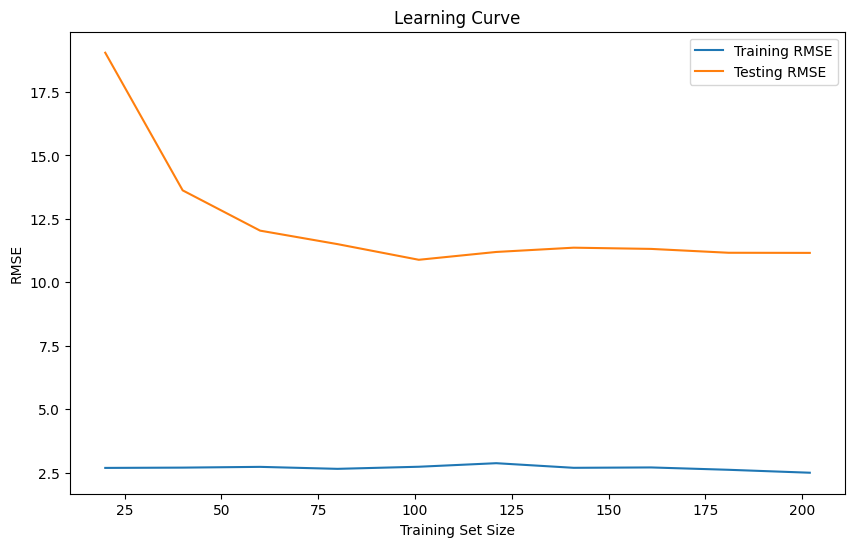

Support Vector Regression - Mean Squared Error (MSE): 2315.002166482007
Support Vector Regression - Root Mean Squared Error (RMSE): 48.11446940871329
Support Vector Regression - Mean Absolute Error (MAE): 38.8906265362448
Support Vector Regression - R-squared (R2): -0.0012911087524707376


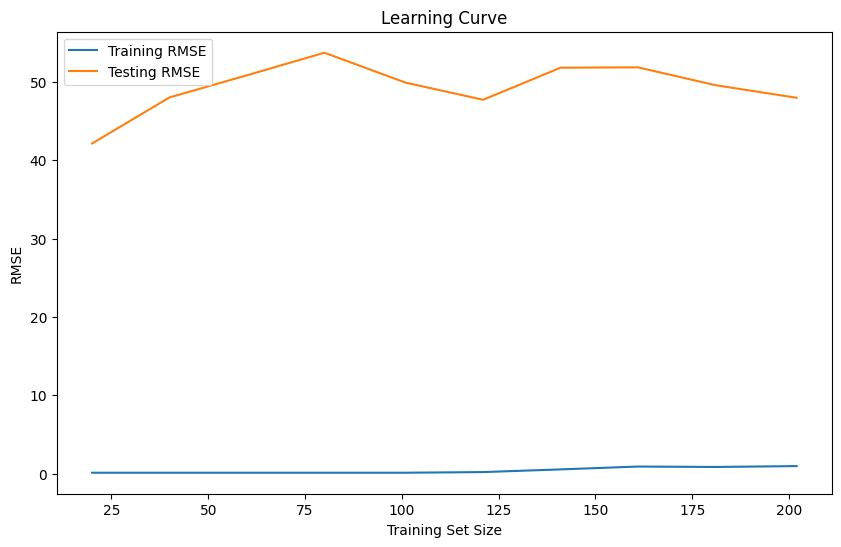

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/drive/MyDrive/TESLA.csv/'


# Select features and target variable
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to compute Confidence Interval using bootstrapping
def bootstrap_confidence_interval(model, X, y, n_bootstrap=1000, ci=95):
    predictions = []
    rng = np.random.default_rng()
    for _ in range(n_bootstrap):
        indices = rng.choice(range(len(X)), len(X), replace=True)
        X_sample, y_sample = X.iloc[indices], y.iloc[indices]
        model.fit(X_sample, y_sample)
        predictions.append(model.predict(X_test))
    predictions = np.array(predictions)
    lower_bound = np.percentile(predictions, (100 - ci) / 2, axis=0)
    upper_bound = np.percentile(predictions, 100 - (100 - ci) / 2, axis=0)
    return lower_bound, upper_bound

# Function to plot learning curves
def plot_learning_curve(model, X, y):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='neg_mean_squared_error'
    )
    train_rmse = np.sqrt(-train_scores)
    test_rmse = np.sqrt(-test_scores)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, np.mean(train_rmse, axis=1), label="Training RMSE")
    plt.plot(train_sizes, np.mean(test_rmse, axis=1), label="Testing RMSE")
    plt.xlabel("Training Set Size")
    plt.ylabel("RMSE")
    plt.legend()
    plt.title("Learning Curve")
    plt.show()

# -------- Random Forest Regressor --------
# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions and evaluate Random Forest
rf_pred = rf_model.predict(X_test)

# Calculate additional performance metrics
rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = np.sqrt(rf_mse)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

# Confidence Interval for Random Forest
rf_ci_lower, rf_ci_upper = bootstrap_confidence_interval(rf_model, X_train, y_train)

print("Random Forest - Mean Squared Error (MSE):", rf_mse)
print("Random Forest - Root Mean Squared Error (RMSE):", rf_rmse)
print("Random Forest - Mean Absolute Error (MAE):", rf_mae)
print("Random Forest - R-squared (R2):", rf_r2)
print("Random Forest - Confidence Interval (95%) lower bound:", rf_ci_lower)
print("Random Forest - Confidence Interval (95%) upper bound:", rf_ci_upper)

# Plot Learning Curve for Random Forest
plot_learning_curve(rf_model, X, y)

# -------- Support Vector Regressor (SVR) --------
# Initialize and train the Support Vector Regressor model
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_model.fit(X_train, y_train)

# Make predictions and evaluate SVR
svr_pred = svr_model.predict(X_test)

# Calculate additional performance metrics
svr_mse = mean_squared_error(y_test, svr_pred)
svr_rmse = np.sqrt(svr_mse)
svr_mae = mean_absolute_error(y_test, svr_pred)
svr_r2 = r2_score(y_test, svr_pred)

print("Support Vector Regression - Mean Squared Error (MSE):", svr_mse)
print("Support Vector Regression - Root Mean Squared Error (RMSE):", svr_rmse)
print("Support Vector Regression - Mean Absolute Error (MAE):", svr_mae)
print("Support Vector Regression - R-squared (R2):", svr_r2)

# Plot Learning Curve for SVR
plot_learning_curve(svr_model, X, y)
